**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# a. import packeges  
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import ipywidgets as widgets

# b. autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# c. import the py-file 
from Problem1 import OptTax
from Problem2 import labor
from Problem3 import GoMs


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

As $L^{\star}$ is not dependent on G, the value of the calculated $L^{\star}$ using the provided formula, should be the same as the optimized value of $L^{\star}$ for $G\in\left\{1.0 , 2.0\right\}$.
We use an optimizer to find the $L^{\star}$ which maximize the utility for the given values of G

In [2]:
# a. define the class
opt = OptTax()

# b. define par 
par = opt.par

# c. optimal L*
L_opt_choice = opt.L_opt()

# d. solve for optimal L
opt.L_solve(print_output = True)

L* = 15.3017
For G  = 1.0, L  = 1.0
For G  = 2.0, L  = 0.75


As expected is the values of L that optimize the utility for $G\in\left\{1.0 , 2.0\right\}$ the same as the calculated $L^{\star}$

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

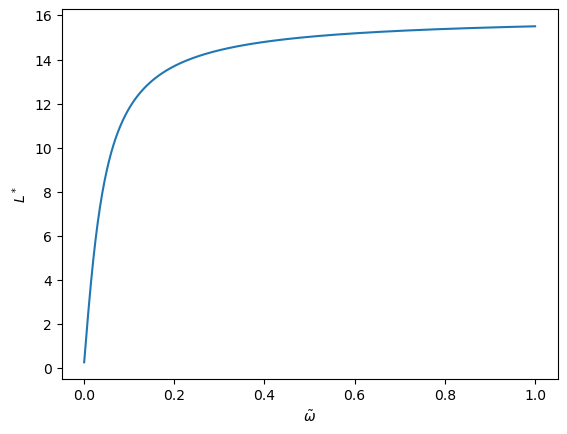

In [3]:
# a. empty list for optimal L
L_opt_sol = []

# b. define points for omega_tilde
ww = np.linspace(0.001,1,1000)

# c. solve for optimal L pepending on omega_tilde
for w in ww:
    # i. opdate omega_tilde
    par.omega_tilde = w
    # ii. append optimal L
    L_opt_sol.append(opt.L_opt())

# d. plot optimal L* as a function of omega_tilde
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(ww, L_opt_sol)
ax.set_xlabel('$\\tilde\omega$')
ax.set_ylabel('$L^*$');

The above plot show the relationship between $L^{\star}(\tilde{w})$ and $w$. It is seen that $L^*$ increases as $\tilde\omega$ increases. This makes economic sense as the workers will have a larger incentive to work as the real wage increases.  


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [4]:
# a. tau list of values close to 0 and up to 1
tauu = np.linspace(0.001,0.999999,1000)

# b. empty list for optimal L, G and utility
L_opt_list = []
G_list = []
util_list = []

# c. solve for optimal L, G and utility given tau
for t in tauu:
    # i. update tau
    par.tau = t
    # ii. update omega_tilde
    par.omega_tilde = (1-par.tau)*par.omega
    # iii. find optimal L and append 
    L_opt_list.append(opt.L_opt())
    # iv. find optimal G and append
    G_list.append(par.tau*par.omega*L_opt_list[-1])
    # v. find utility and append
    util_list.append(opt.V_equation(tau = par.tau, L = L_opt_list[-1], G = G_list[-1], out=1));

# d. define the ToggleButtons widget
options = ['L*', 'G', 'Utility']
toggle_buttons = widgets.ToggleButtons(options=options, description='Function:', disabled=False)

# e. function to update the plot
def update_plot(dataset):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    # i. plot L 
    if dataset == 'L*':
        ax.plot(tauu, L_opt_list)
    # ii. plot G 
    elif dataset == 'G':
        ax.plot(tauu, G_list)
    # iii. plot utility
    elif dataset == 'Utility':
        ax.plot(tauu, util_list)
    ax.set_xlabel('$\\tau$')

# f. connect the ToggleButtons widget to the update function
widgets.interactive(update_plot, dataset=toggle_buttons)

interactive(children=(ToggleButtons(description='Function:', options=('L*', 'G', 'Utility'), value='L*'), Outp…

From the above interactive plot it is seen, as $\tau$ increases $L^*$ decreases. This follows the reasoning from the real wage, as the tax increases the workers will have less diposible income to consume. It further appears that $G$ increases towards the peak around $\tau$ = 0.85, and decreases rapidly towards $\tau$ = 1. This could incicate that for values above $\tau$ = 0.85, the workers will have so little incentive to work that $L^*$ decreases and therefore also the Goverments revenue. Lastly, a concave utility function appears with maximum around $\tau$ = 0.5. This incicates that the workers utility is maximized when there is a balanced between their own consumption and goverment spending. 


**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

Optimal tau: 0.53271484375
Optimal V:   1.8695


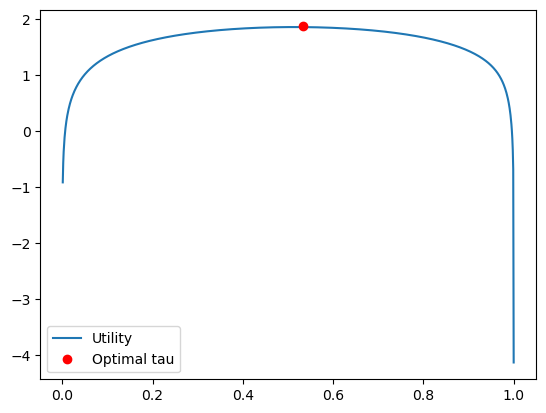

In [5]:
# a. reset parameters
opt = OptTax()

# b. solve for optimal tau
optimal_tau = opt.tau_solve()

# c. find optimal V
V = opt.V_equation(optimal_tau, out = 1)

# d. plot the optimal tau with the utility 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.linspace(0.001,1,1000), util_list, label='Utility')
ax.plot(optimal_tau, V, 'ro', label='Optimal tau')
ax.legend()

# e. print results
print(f"Optimal tau: {optimal_tau}")
print(f"Optimal V:   {V.round(4)}")


We find that the optimal $\tau$ = 0.5327. This seems reasonable given the results from the previous question. The maximum point is illustrated on the above figure. 

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

We create a function which loop over different values of G until the equation for G is fulfilled, while maximizing the worker problem.

In [6]:
# a. reset class
opt = OptTax()

# b. find G
opt.G_loop(optimal_tau, out=1)

trial value of G = 7.95
G = 7.96
 L = 14.95
 V = 1.86
 tau = 0.53


In [7]:
# a. reset parameters
opt = OptTax()
par = opt.par
par.sigma = 1.5
par.rho = 1.5
par.epsilon = 1.5

# b. find G
opt.G_loop(optimal_tau, out=1)


trial value of G = 3.38
G = 3.4
 L = 6.38
 V = 0.88
 tau = 0.53


In the first case the value of G, which satisfy the equation is $G = 7.96$, in the second case the value is $G = 3.4$

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

We find the socially optimal tax rate, $\tau^{\star}$, by using our solution for G from before and loop through values of $\tau$ until we find the optimal. 

In [8]:
# a. reset parameters
opt = OptTax()
par = opt.par

# a. calculate optimal tau
opt.tau_loop()

trial value of G = 7.77
G = 7.79
 L = 14.98
 V = 1.86
 tau = 0.52


In [9]:
# a. reset parameters
opt = OptTax()
par = opt.par
par.sigma = 1.5
par.rho = 1.5
par.epsilon = 1.5

# b. calculate optimal tau
opt.tau_loop()


trial value of G = 3.17
G = 3.18
 L = 6.49
 V = 0.88
 tau = 0.49


This leads us to two very similar values of $\tau^{\star}$. In the first case it is $\tau^{\star} = 0.52$, and in the second $\tau^{\star} = 0.49$


## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [10]:
# a. Load in class
l_model = labor()

We use the given equation to calculate the value   of the optimal $\ell_{t}$ for the 2 values of $\kappa$.
Afterwards we use an optimizer to find the values $\ell_{t}$ which maximizes the given utility function numerically. We then compare the two results.

In [11]:
# a. create starting values
k_vec = np.linspace(1,2,2)
guess = 1
par = l_model.par
# b. loop through values of kappa
for k in k_vec: 
    # i. caluclate L from fomula
    L = l_model.l_star(k)
    # ii. objective function (to minimize) 
    def objective(x):
        return -(k*(x**(1-par.eta))-par.w*x)
    # o. objective function 
    obj = lambda x: objective(x)

    # iii. optimize L
    result = optimize.minimize(obj, guess,  method = 'Nelder-Mead', bounds=[(0.000001,np.inf)])
    print(f'For kappa = {k}')
    print(f'Estimated L = {result.x[0].round(2)}')
    print(f'Calculated L = {L}')

For kappa = 1.0
Estimated L = 0.25
Calculated L = 0.25
For kappa = 2.0
Estimated L = 1.0
Calculated L = 1.0


As expected is the calculated value and estimated value for $\ell_{t}$ the same. This means that we can verify that the given equation maximize utility.
It is also posible to confirm this analytical.

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

We make a function in our class which follows the instruction of the model above.
We choose a K = 100, as we see a seemingly steady value for H as this number as well as a acceptable running time for the code.

In [12]:
# a. run function to calculate H
l_model.H(out=1, print_out=1)


For policy 1: H = 26.906


Given the policy function from Question 1, the expected value of the salon is equal to 26.9.

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [13]:
# a. calculate H for policy 2
l_model.H(out=2, print_out=1)

For policy 2: H = 27.5784


The new policy increases the value to 27.6. This makes sense economically as it takes into account the adjustment cost. Therefore the salon avoid making small personel changes as the fixed cost is higher than the gain of making these small adjustment to the staff.

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [14]:
# a. define objective function to optimize
def objective(x):
        return -(l_model.H(out=2, Delta = x))

    # o. objective function 
obj = lambda x: objective(x)

# i. initial guess
guess = 0

# b. maximize
result = optimize.minimize(obj, guess, method='Nelder-Mead')

#c. print results
print(f'Optimal Delta = {result.x[0].round(2)}')
print(f'Maximum H = {(l_model.H(out=2, Delta = result.x[0]).round(4))}')


Optimal Delta = 0.08
Maximum H = 27.6468


The optimal $\Delta$ is equal to 0.08. The increase in value from the original $\Delta$ is only around 0.09, but is however 0.8 larger that the original policy. This indicates that the new policy is usefull, but the interval for and more optimal $\Delta$ is quite small. This is also depicted on the graph below, which show that the value H is seemingly pretty constant between 0.05 and 0.15, but that the value decreases drasticly as $\Delta$ goes above 0.25. This makes sense as this will go above just taking the adjustments cost into account.


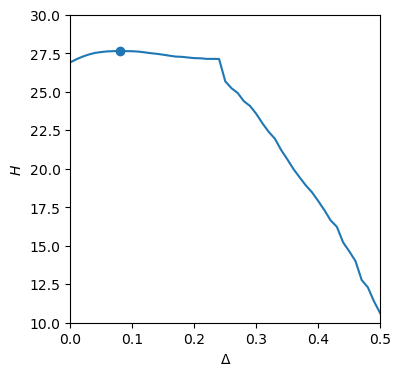

In [15]:
# a. make grid of H and Delta
Delta_max = 0.5
H_vec = np.empty(0)
Delta_vec = np.linspace(0,Delta_max,51)
for i in Delta_vec:
    H_vec = np.append(H_vec,l_model.H(out=2, Delta = i))
                

# b. plot H values
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.plot(Delta_vec,H_vec)
ax.scatter(result.x[0].round(2),l_model.H(out=2, Delta = result.x[0]))

ax.set_xlabel('$\Delta$')
ax.set_ylabel('$H$')
ax.set_xlim([0,Delta_max])
ax.set_ylim([10,30]);


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



We implement a policy which says that the salon should only make personel changes, if the absolut value of $\epsilon_{t}$ is belov the variance $\sigma_{\epsilon}$. This is to make sure that the salon only take on the extra fixed cost of adjusting in periods with less demand shocks. As the demand shocks follows a AR(1) process the high shocks of $\epsilon$ will follow into future periods, therefore it is the theory that it will be good to stay put.

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\epsilon_{t} \right|<\sigma_{\epsilon}\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$

In [16]:
# a. calculate H for policy 3
l_model.H(out=3, print_out=1)

For policy 3: H = 27.0462


As we implement the policy we see that the Value H increases a tiny bit from the original policy, but is not better than the policy which was suggested. 

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [17]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [18]:
# a. call the GoMs class 
goms = GoMs()

# b. run the global optimization
goms.global_opt()


k =    0: x_k0 = ( -13.87,-196.23) -> converged to ( -12.56,-195.29) with f =   9.58367609
k =    1: x_k0 = (-148.96,  38.44) -> converged to (-147.58,  39.95) with f =   5.84708245
k =    2: x_k0 = (-518.27, 101.43) -> converged to (-518.10, 102.08) with f =  69.74904156
k =    3: x_k0 = (-314.52,-407.09) -> converged to (-313.99,-408.33) with f =  66.38723699
k =    4: x_k0 = (-417.46,-447.52) -> converged to (-417.61,-448.26) with f =  93.91192731
k =    5: x_k0 = (-207.07, 232.98) -> converged to (-207.24, 230.80) with f =  24.07289447
k =    6: x_k0 = (-169.24, 469.64) -> converged to (-169.56, 470.46) with f =  62.58264265
k =    7: x_k0 = (-357.74,-467.28) -> converged to (-354.81,-466.02) with f =  85.84083442
k =    8: x_k0 = (  33.07, 441.19) -> converged to (  34.54, 439.40) with f =  48.61567718
k =    9: x_k0 = (-285.75,  -0.73) -> converged to (-285.74,  -4.44) with f =  20.42724970
k =   10: x_k0 = (-116.65,  37.98) -> converged to (-116.18,  39.95) with f =   3.77550250

The above show that the model converges to alot of different local minima depending on the starting values which are chosen. The best solution finds the global minimum with starting values for $x_1$ and $x_2$ very close to the real value at (0,0). When this is the case, it can converge to the global minimum $f(0,0)=0$. We further see that the actual minimizing values for $x_1$ and $x_2$ is smaller than the tolerance, which makes the loop stop after 402 iterations. 


**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [19]:
# a. call the GoMs class to reset the parameters
goms = GoMs()

# b. set the parameters
par = goms.par

# c. set K_bar 
par.K_bar = 100

# d. run the global optimization
goms.global_opt()

k =    0: x_k0 = ( -13.87,-196.23) -> converged to ( -12.56,-195.29) with f =   9.58367609
k =    1: x_k0 = (-148.96,  38.44) -> converged to (-147.58,  39.95) with f =   5.84708245
k =    2: x_k0 = (-518.27, 101.43) -> converged to (-518.10, 102.08) with f =  69.74904156
k =    3: x_k0 = (-314.52,-407.09) -> converged to (-313.99,-408.33) with f =  66.38723699
k =    4: x_k0 = (-417.46,-447.52) -> converged to (-417.61,-448.26) with f =  93.91192731
k =    5: x_k0 = (-207.07, 232.98) -> converged to (-207.24, 230.80) with f =  24.07289447
k =    6: x_k0 = (-169.24, 469.64) -> converged to (-169.56, 470.46) with f =  62.58264265
k =    7: x_k0 = (-357.74,-467.28) -> converged to (-354.81,-466.02) with f =  85.84083442
k =    8: x_k0 = (  33.07, 441.19) -> converged to (  34.54, 439.40) with f =  48.61567718
k =    9: x_k0 = (-285.75,  -0.73) -> converged to (-285.74,  -4.44) with f =  20.42724970
k =   10: x_k0 = ( -85.72,  36.00) -> converged to ( -87.92,  35.51) with f =   2.24898708

We see that it take a bit more iterations to find the best solution. Further the time is close to the same as at the original value of $\underline{K} = 10$. The time differs a little from time to time we run the cell, but in general the trend is that they converges around the same time. 
The conclusion must be that the value of $\underline{K}$ does not make it converge faster. 